# Assignment2 - PS11 Tip Prediction

**Group 128**

Group details as follows

|Name|BITS Id|Contribution|
|:---|:---|:---|
|[Vinayak Nayak](https://github.com/ElisonSherton)|2021fc04135|100%|
|[Niyati Gangwal](https://github.com/NiyatiGangwal)|2021fc04140|100%|
|[Shreysi Kalra](https://github.com/shreyasi25)|2021fc04586|100%|

# Problem Statement

**Predict tip amount given some parameters.**

## Part A

Explore the data and preprocess it.

### Import dataset and libraries

Dataset is downloaded to the disk and libraries are installed in the local conda environment.

In [2]:
# !pip install -q numpy pandas scikit-learn sklego matplotlib seaborn jupyter

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### Data Visualization and Exploration

<div class="alert alert-block alert-info" style="color:gray">
    Read the dataset. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
</div>

In [4]:
df = pd.read_csv("./tip.csv")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


<div class="alert alert-block alert-info" style="color:gray">
    Print the description and Basic statistical details.
</div>

Most of the features in our dataset are self-explanatory.

- `total_bill`: The bill amount of the meal
- `tip`: The amount tipped to the waiter
- `sex`: The gender of the person
- `smoker`: Whether the person smokes tobacco or not
- `day`: The day the transaction happened
- `time`: The kind of meal which the person had

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observation</b>
<ul>
<li> There are 244 instances in total in the dataset.</li>    
<li> Data has no missing instances.</li>
<li> There are two numerical and four categorical columns. The `size` column is a little dubious, we need to investigate that further.</li>
<li> The target `tip` is continuous in nature. </li>    
</ul>
</div>

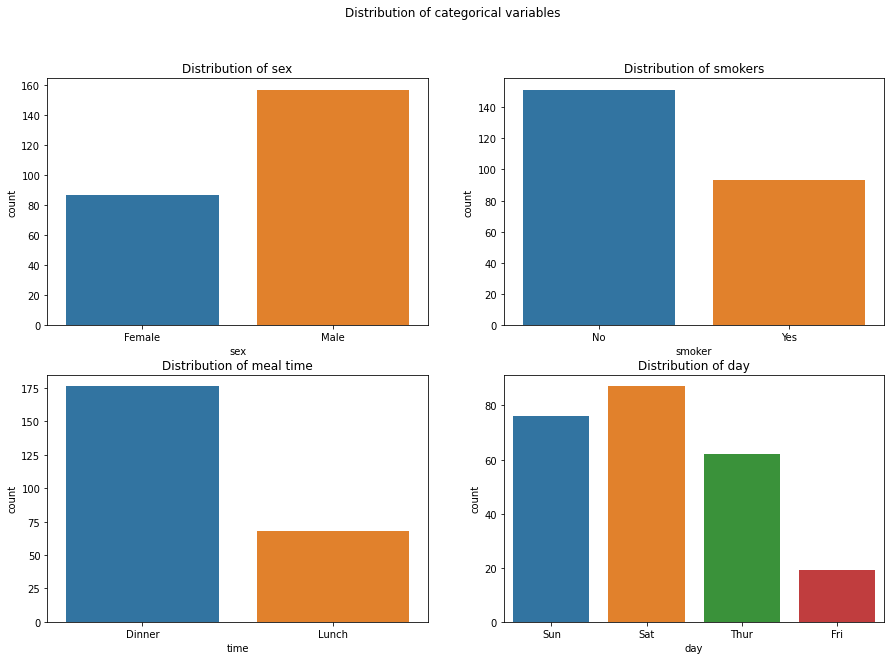

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (15,10))
ax = ax.flat

sns.countplot(x = df.sex, ax = ax[0]); ax[0].set_title("Distribution of sex")
sns.countplot(x = df.smoker, ax = ax[1]); ax[1].set_title("Distribution of smokers")
sns.countplot(x = df.time, ax = ax[2]); ax[2].set_title("Distribution of meal time")
sns.countplot(x = df.day, ax = ax[3]); ax[3].set_title("Distribution of day")

fig.suptitle("Distribution of categorical variables", fontsize = 12);

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observation</b>
<ul>
<li> Most of this restaurant's visitors are males.</li>    
<li> There are more non-smokers than smokers in the records.</li>
<li> The restaurant has a lot of visitors in the evening for dinner as opposed to lunch in the morning. </li>    
<li> The dataset contains transactions happening close to the weekend. Either the restaurant is open 4 days a week or the provided dataset is a subset of all transactions</li>
</ul>
</div>

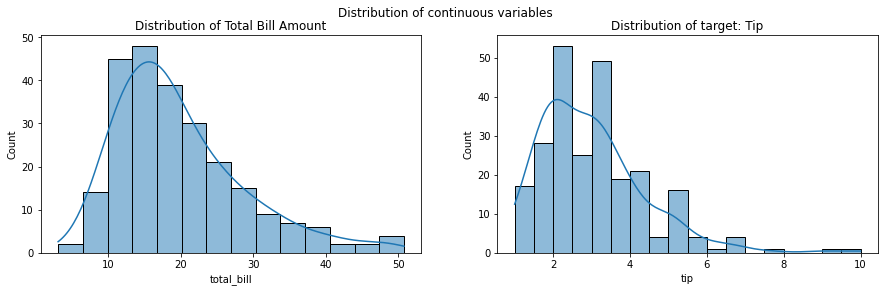

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 4))

sns.histplot(x = df.total_bill, ax = ax[0], kde = True); ax[0].set_title("Distribution of Total Bill Amount")
sns.histplot(x = df.tip, ax = ax[1], kde = True); ax[1].set_title("Distribution of target: Tip")

fig.suptitle("Distribution of continuous variables", fontsize = 12);

<div class="alert alert-warning alert-info" style="color:gray">
    <b>Observation</b>
<ul>
<li> The total bill amount seems to be highly concentrated around 15 dollars with a slight right skew. This seems to suggest that the restaurant is not a fine-dine or 5-star kind of restaurant but a more middle-class family restaurant where occasionally some person/family visit who have a lot of food as opposed to other people/family.</li>    
<li> Target variable Tip also seems to follow a left-skewed distribution with between 2 to 4 dollars being the most frequent range of tippers.</li>
</ul>
</div>